# 2nd Block

- *2nd block*:
    - e-invoicing
    - cloud computing
    - big data analysis
    - skills and training in ICT

## Import Libraries

In [1]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np 
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

%matplotlib inline

In [2]:
import plotly.offline as pyo

# Set notebook mode to work in offline
pyo.init_notebook_mode()

## Dataset 1 (e-invoicing)

In [3]:
e_invoicing = pd.read_csv("data/2nd_block/e-invoicing.csv")

# Drop useless columns
e_invoicing = e_invoicing.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags"], axis=1)
e_invoicing = e_invoicing.drop(e_invoicing[e_invoicing['NACE 2007'] != "total economic activities  (c-n, including 951, excluding 75 and k)"].index)
e_invoicing = e_invoicing.drop(e_invoicing[e_invoicing['Size classes of persons employed'] != "10 and over"].index)

In [4]:
e_invoicing.head(10)

Territory                                          Data type  \
38        Italy  enterprises sending invoices to other eneterpr...   
86        Italy  enterprises sending invoices to other eneterpr...   
134       Italy  enterprises sending invoices to other eneterpr...   
144  Nord-ovest  enterprises sending invoices to other eneterpr...   
145  Nord-ovest  enterprises sending invoices to other eneterpr...   
146  Nord-ovest  enterprises sending invoices to other eneterpr...   
147    Nord-est  enterprises sending invoices to other eneterpr...   
148    Nord-est  enterprises sending invoices to other eneterpr...   
149    Nord-est  enterprises sending invoices to other eneterpr...   
150  Centro (I)  enterprises sending invoices to other eneterpr...   

                                             NACE 2007  \
38   total economic activities  (c-n, including 951...   
86   total economic activities  (c-n, including 951...   
134  total economic activities  (c-n, including 951...   
144  total economic activities  (c-n, including 951...   
145  total economic activities  (c-n, including 951...   
146  total economic activities  (c-n, including 951...   
147  total economic activities  (c-n, including 951...   
148  total economic activities  (c-n, including 951...   
149  total economic activities  (c-n, including 951...   
150  total economic activities  (c-n, including 951...   

    Size classes of persons employed  TIME  Value  
38                       10 and over  2018  85.64  
86                       10 and over  2018  41.62  
134                      10 and over  2018  68.94  
144                      10 and over  2018  85.31  
145                      10 and over  2018  36.78  
146                      10 and over  2018  74.01  
147                      10 and over  2018  87.31  
148                      10 and over  2018  43.36  
149                      10 and over  2018  72.38  
150                      10 and over  2018  82.31

In [5]:
# Replace long data types with shorter data types
new_data_types = ['Paper sending', 'Suitable for automation', 'Non suitable for automation']
e_invoicing_datatype = e_invoicing


for index, data_type in enumerate(e_invoicing_datatype['Data type'].unique()):
    e_invoicing_datatype.loc[e_invoicing_datatype['Data type'] == data_type, 'Data type'] = new_data_types[index]
    

# geographical area based
geo_areas = ['Nord-ovest', 'Nord-est', 'Centro (I)', 'Mezzogiorno']
e_invoicing_geo_area = e_invoicing_datatype.loc[e_invoicing_datatype['Territory'].isin(geo_areas)]

In [6]:
e_invoicing_geo_area.head(15)

Territory                    Data type  \
144   Nord-ovest                Paper sending   
145   Nord-ovest      Suitable for automation   
146   Nord-ovest  Non suitable for automation   
147     Nord-est                Paper sending   
148     Nord-est      Suitable for automation   
149     Nord-est  Non suitable for automation   
150   Centro (I)                Paper sending   
151   Centro (I)      Suitable for automation   
152   Centro (I)  Non suitable for automation   
153  Mezzogiorno                Paper sending   
154  Mezzogiorno      Suitable for automation   
155  Mezzogiorno  Non suitable for automation   

                                             NACE 2007  \
144  total economic activities  (c-n, including 951...   
145  total economic activities  (c-n, including 951...   
146  total economic activities  (c-n, including 951...   
147  total economic activities  (c-n, including 951...   
148  total economic activities  (c-n, including 951...   
149  total economic activities  (c-n, including 951...   
150  total economic activities  (c-n, including 951...   
151  total economic activities  (c-n, including 951...   
152  total economic activities  (c-n, including 951...   
153  total economic activities  (c-n, including 951...   
154  total economic activities  (c-n, including 951...   
155  total economic activities  (c-n, including 951...   

    Size classes of persons employed  TIME  Value  
144                      10 and over  2018  85.31  
145                      10 and over  2018  36.78  
146                      10 and over  2018  74.01  
147                      10 and over  2018  87.31  
148                      10 and over  2018  43.36  
149                      10 and over  2018  72.38  
150                      10 and over  2018  82.31  
151                      10 and over  2018  40.18  
152                      10 and over  2018  62.79  
153                      10 and over  2018  87.37  
154                      10 and over  2018  48.50  
155                      10 and over  2018  62.67

### Plotly

#### Treemap

In [7]:
e_invoicing_geo_area["Italy"] = "Italy"
fig = px.treemap(e_invoicing_geo_area, path=['Italy', 'Territory', 'Data type'], color='Value',
                  color_continuous_scale='RdBu', range_color=[0, max(e_invoicing_geo_area['Value'])],
                  color_continuous_midpoint=np.average(e_invoicing_geo_area['Value']),
                  width=1000, height=800)
fig.show()

C:\Users\Roncax\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Barchart

In [8]:
x_data = list(e_invoicing_geo_area['Data type'].unique())

y_data = []
for territory in e_invoicing_geo_area['Territory'].unique():
    y_data.append(list(e_invoicing_geo_area.loc[e_invoicing_geo_area['Territory'] == territory]['Value']))


marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=e_invoicing_datatype['Territory'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600)
fig

In [9]:
x_data = list(e_invoicing_geo_area['Territory'].unique())

y_data = []
for territory in e_invoicing_geo_area['Data type'].unique():
    y_data.append(list(e_invoicing_geo_area.loc[e_invoicing_geo_area['Data type'] == territory]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=e_invoicing_datatype['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600)
fig

### Seaborn

#### Data type vs Terrytory

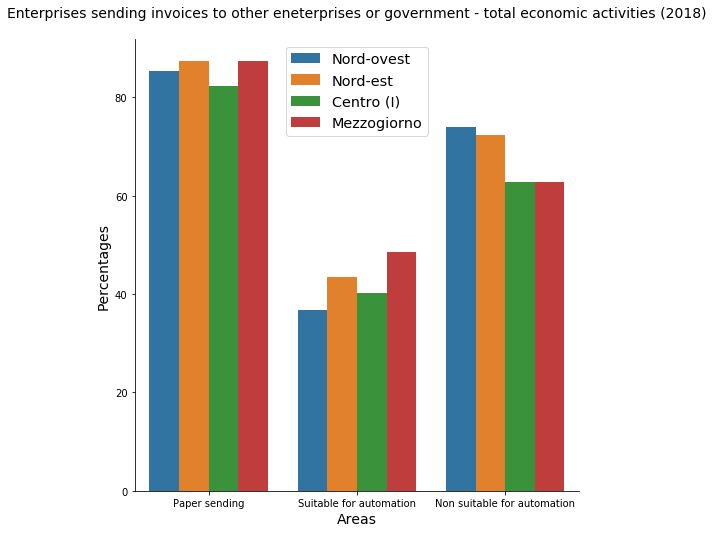

In [10]:
ax = sns.catplot(x='Data type', y='Value', hue='Territory', data=e_invoicing_geo_area, kind='bar', height=7, aspect=1)
plt.title('Enterprises sending invoices to other eneterprises or government - total economic activities (2018)\n', fontsize=14)
plt.xlabel('Areas', fontsize=14)
plt.ylabel('Percentages', fontsize=14)
ax._legend.remove()


plt.legend(fontsize='x-large', title_fontsize='40')

#### Terrytory vs Data type

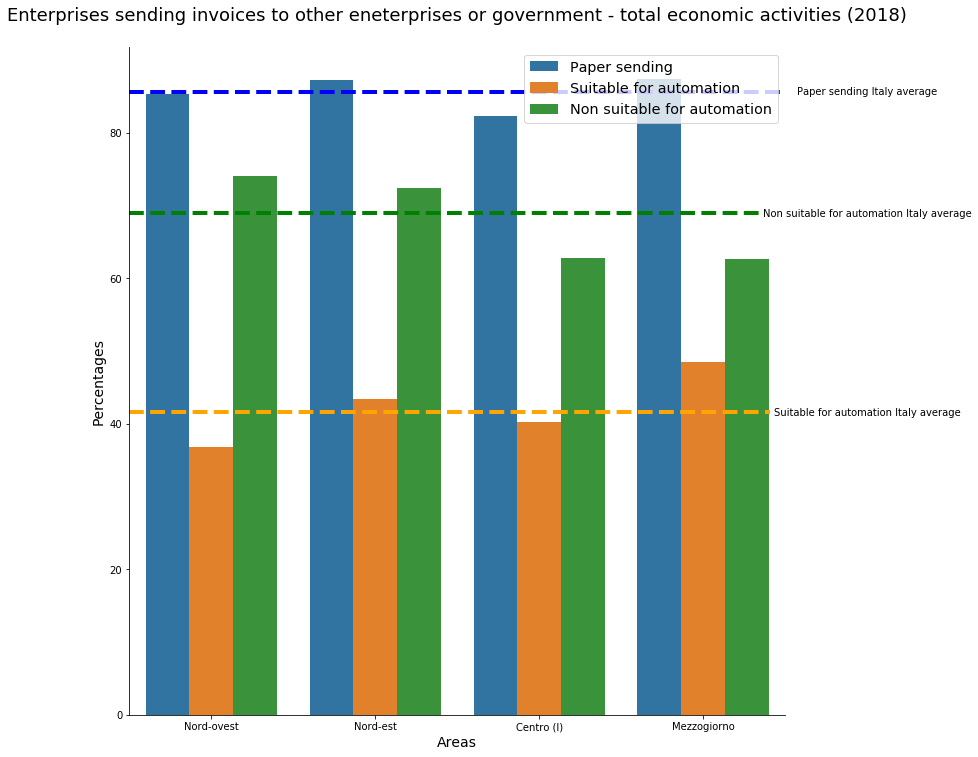

In [11]:
ax = sns.catplot(x='Territory', y='Value', hue='Data type', data=e_invoicing_geo_area, kind='bar', height=10, aspect=1)
plt.title('Enterprises sending invoices to other eneterprises or government - total economic activities (2018)\n', fontsize=18)
plt.xlabel('Areas', fontsize=14)
plt.ylabel('Percentages', fontsize=14)
ax._legend.remove()


plt.legend(fontsize='x-large', title_fontsize='40')

#Drawing 3 horizontal line at the italian's total
national_average = e_invoicing_datatype.loc[e_invoicing_datatype['Territory'] == 'Italy']
bar_colors= {'Paper sending' : 'blue', 'Suitable for automation' : 'orange', 'Non suitable for automation' : 'green'}

for index, row in national_average.iterrows():
    value = row.loc['Value']
    plt.axhline(value, linewidth=4, color = bar_colors[row.loc['Data type']], linestyle = '--')
    plt.text(4, value, row.loc['Data type'] + ' Italy average', fontsize=10, va='center', ha='center', backgroundcolor='w')


#### Choropleth map

Preparazione per utilizzare le macro aree:

In [12]:
regions = {'Piemonte' : 'Nord-ovest',
           "Valle d'Aosta" : 'Nord-ovest',
           'Lombardia' : 'Nord-ovest',
           'Liguria' : 'Nord-ovest',
           'Friuli Venezia Giulia' : 'Nord-est',
           'Trentino-Alto Adige' : 'Nord-est',
           'Bolzano' : 'Nord-est',
           'Trento' : 'Nord-est',
           'Veneto' : 'Nord-est',
           'Emilia-Romagna' : 'Nord-est',
           'Toscana' : 'Centro (I)',
           'Umbria' : 'Centro (I)',
           'Marche' : 'Centro (I)',
           'Lazio' : 'Centro (I)',
           'Sardegna' : 'Mezzogiorno',
           'Sicilia' : 'Mezzogiorno',
           'Abruzzo' : 'Mezzogiorno',
           'Molise' : 'Mezzogiorno',
           'Puglia' : 'Mezzogiorno',
           'Campania' : 'Mezzogiorno',
           'Calabria' : 'Mezzogiorno',
           'Basilicata' : 'Mezzogiorno',
          }

map_reg = gpd.read_file(os.path.join('assets', 'maps', 'Reg01012019_g', 'Reg01012019_g_WGS84.shp'))

map_reg['DEN_REG'] = map_reg['DEN_REG'].replace(regions)

In [13]:

# Create specific subset of the dataset 
paper_invoice  = e_invoicing_geo_area.drop(e_invoicing_geo_area[e_invoicing_geo_area['Data type'] != "Paper sending"].index)
automated_invoice  = e_invoicing_geo_area.drop(e_invoicing_geo_area[e_invoicing_geo_area['Data type'] != "Suitable for automation"].index)
non_automated_invoice  = e_invoicing_geo_area.drop(e_invoicing_geo_area[e_invoicing_geo_area['Data type'] != "Non suitable for automation"].index)


# Merge the map with the pandas df
merged_paper = pd.merge(map_reg, paper_invoice, left_on='DEN_REG', right_on='Territory', how='left')
merged_automated = pd.merge(map_reg, automated_invoice, left_on='DEN_REG', right_on='Territory', how='left')
merged_non_automated = pd.merge(map_reg, non_automated_invoice, left_on='DEN_REG', right_on='Territory', how='left')

# Union of the map by macro-area
merged_paper = merged_paper.dissolve('Territory')
merged_automated = merged_automated.dissolve('Territory')
merged_non_automated = merged_non_automated.dissolve('Territory')
merged_paper

geometry  COD_RIP  \
Territory                                                                 
Centro (I)   MULTIPOLYGON (((875952.995 4524692.050, 875769...        3   
Mezzogiorno  MULTIPOLYGON (((1265545.785 4472504.620, 12655...        4   
Nord-est     MULTIPOLYGON (((618343.929 4893985.661, 618335...        2   
Nord-ovest   MULTIPOLYGON (((568003.372 4884382.030, 568004...        1   

             COD_REG      DEN_REG    Shape_Leng    Shape_Area      Data type  \
Territory                                                                      
Centro (I)         9   Centro (I)  1.305938e+06  2.298395e+10  Paper sending   
Mezzogiorno       16  Mezzogiorno  1.178211e+06  1.953564e+10  Paper sending   
Nord-est           4     Nord-est  8.008937e+05  1.360755e+10  Paper sending   
Nord-ovest         1   Nord-ovest  1.236787e+06  2.539389e+10  Paper sending   

                                                     NACE 2007  \
Territory                                                        
Centro (I)   total economic activities  (c-n, including 951...   
Mezzogiorno  total economic activities  (c-n, including 951...   
Nord-est     total economic activities  (c-n, including 951...   
Nord-ovest   total economic activities  (c-n, including 951...   

            Size classes of persons employed  TIME  Value  Italy  
Territory                                                         
Centro (I)                       10 and over  2018  82.31  Italy  
Mezzogiorno                      10 and over  2018  87.37  Italy  
Nord-est                         10 and over  2018  87.31  Italy  
Nord-ovest                       10 and over  2018  85.31  Italy

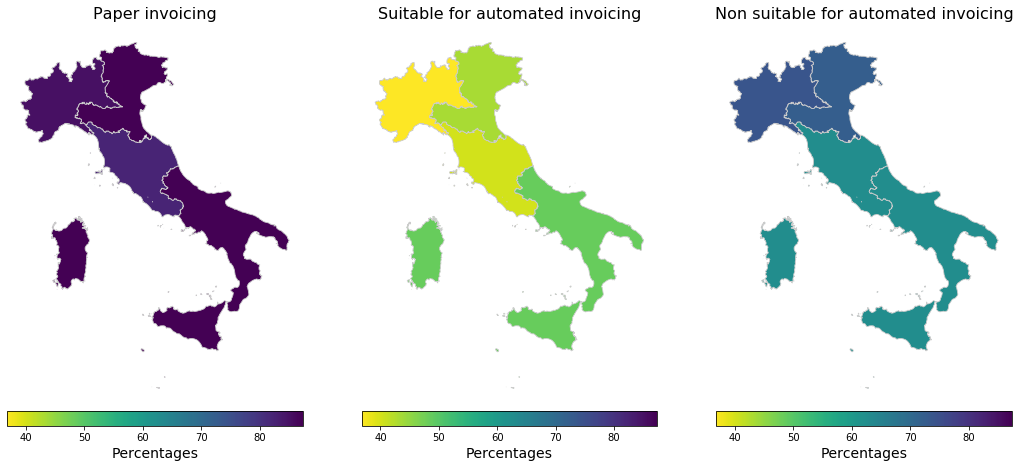

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 10))


# FIRST GRAPH: "Percentage of enterprises with paper invoicing"
ax[0].axis('off')
ax[0].set_title('Paper invoicing', fontsize=16)
merged_paper.plot(column='Value', vmin = min(e_invoicing_geo_area['Value']), vmax = max(e_invoicing_geo_area['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=False)

# Create the first colorbar
norm = colors.Normalize(vmin=min(e_invoicing_geo_area['Value']), vmax=max(e_invoicing_geo_area['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[0], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=14)

# SECOND GRAPH: "Percentage of enterprises with invoicing suitable for automation"
ax[1].axis('off')
ax[1].set_title('Suitable for automated invoicing', fontsize=16)
merged_automated.plot(column='Value', vmin = min(e_invoicing_geo_area['Value']), vmax = max(e_invoicing_geo_area['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=False)

# Create the second colorbar
norm = colors.Normalize(vmin=min(e_invoicing_geo_area['Value']), vmax=max(e_invoicing_geo_area['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[1], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=14)

# Third GRAPH: "Percentage of enterprises with invoicing non suitable for automation"
ax[2].axis('off')
ax[2].set_title('Non suitable for automated invoicing', fontsize=16)
merged_non_automated.plot(column='Value', vmin = min(e_invoicing_geo_area['Value']), vmax = max(e_invoicing_geo_area['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=False)

# Create the third colorbar
norm = colors.Normalize(vmin=min(e_invoicing_geo_area['Value']), vmax=max(e_invoicing_geo_area['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[2], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=14)


## Dataset 2 (cloud computing)

In [15]:
complete_dataframe = pd.read_csv("data/2nd_block/cloud_computing.csv")

# Drop useless columns and rows
complete_dataframe = complete_dataframe.drop(complete_dataframe[complete_dataframe['NACE 2007'] != "total economic activities  (c-n, including 951, excluding 75 and k)"].index)
complete_dataframe = complete_dataframe.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags", "NACE 2007", "Size classes of persons employed"], axis=1)

# geographical area based
geo_areas = ['Nord-ovest', 'Nord-est', 'Centro (I)', 'Mezzogiorno']
complete_dataframe = complete_dataframe.loc[complete_dataframe['Territory'].isin(geo_areas)]

In [16]:
complete_dataframe.head(10)

Territory                                          Data type  TIME  \
672  Nord-ovest                                             e-mail  2018   
673  Nord-ovest  office software (e.g. word processors, spreads...  2018   
674  Nord-ovest                                   storage of files  2018   
675  Nord-ovest              hosting for the enterprise's database  2018   
676  Nord-ovest        finance or accounting software applications  2018   
677  Nord-ovest          customer relationship management software  2018   
678  Nord-ovest  computing power to run the enterprise's own so...  2018   
679  Nord-ovest             at least one of the mentioned services  2018   
680  Nord-ovest                                        only e-mail  2018   
681  Nord-ovest                                           only low  2018   

     Value  
672  20.30  
673  12.34  
674  15.73  
675  12.70  
676   8.37  
677   6.68  
678   4.05  
679  24.72  
680   3.01  
681   7.84

In [17]:
text = ["at least one of the mentioned services", "only e-mail", "only low", "only medium", "high", "shared servers of service providers", "servers of service providers exclusively reserved for the enterprise"]

In [18]:
df_1 = complete_dataframe
for t in text:
    df_1 = df_1.drop(df_1[df_1['Data type'] == t].index)

In [19]:
fig = px.bar(df_1, x="Territory", y="Value", color="Data type", title="Employees ICT skills indicator", )
#fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.5,
    xanchor="center",
    x=1,
    title = "Areas: "
), xaxis={'categoryorder':'total descending'})

fig.show()

In [20]:
df_1 = complete_dataframe
text = "only e-mail"
df_1 = df_1.drop(df_1[df_1['Data type'] != text].index)

x_data = list(df_1['Territory'].unique())

y_data = []
for dt in df_1['Data type'].unique():
    y_data.append(list(df_1.loc[df_1['Data type'] == dt]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=df_1['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600, xaxis={'categoryorder':'total descending'}, title="Percentages only e-mail enterprises")
fig

In [21]:
df_1 = complete_dataframe
text = "at least one of the mentioned services"
df_1 = df_1.drop(df_1[df_1['Data type'] != text].index)

x_data = list(df_1['Territory'].unique())

y_data = []
for dt in df_1['Data type'].unique():
    y_data.append(list(df_1.loc[df_1['Data type'] == dt]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=df_1['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600, xaxis={'categoryorder':'total descending'}, title="Percentages of enterprises that use at least one of the mentioned services")
fig

In [22]:
df_1 = complete_dataframe
text = ["at least one of the mentioned services", "only e-mail", "shared servers of service providers", "servers of service providers exclusively reserved for the enterprise", "e-mail", "office software (e.g. word processors, spreadsheets, etc.)", "storage of files", "hosting for the enterprise's database", "finance or accounting software applications", "customer relationship management software", "computing power to run the enterprise's own software "]

for t in text:
    df_1 = df_1.drop(df_1[df_1['Data type'] == t].index)

In [23]:
x_data = list(df_1['Territory'].unique())

y_data = []
for dt in df_1['Data type'].unique():
    y_data.append(list(df_1.loc[df_1['Data type'] == dt]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=df_1['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600, xaxis={'categoryorder':'total descending'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.4,
    xanchor="center",
    x=1,
    title = "Areas: "
),
                 title = "Enterprises buying cloud computing services, by type of level of services bought")
fig

In [24]:
text_1 = "shared servers of service providers"
text_2 = "servers of service providers exclusively reserved for the enterprise"

# Create specific subset of the dataset 
df_1  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_1].index)
df_2  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_2].index)

# Merge the map with the pandas df
merged_1 = pd.merge(map_reg, df_1, left_on='DEN_REG', right_on='Territory', how='left')
merged_2 = pd.merge(map_reg, df_2, left_on='DEN_REG', right_on='Territory', how='left')

# Union of the map by macro-area
merged_1 = merged_1.dissolve('Territory')
merged_2 = merged_2.dissolve('Territory')
merged_1

geometry  COD_RIP  \
Territory                                                                 
Centro (I)   MULTIPOLYGON (((875952.995 4524692.050, 875769...        3   
Mezzogiorno  MULTIPOLYGON (((1265545.785 4472504.620, 12655...        4   
Nord-est     MULTIPOLYGON (((618343.929 4893985.661, 618335...        2   
Nord-ovest   MULTIPOLYGON (((568003.372 4884382.030, 568004...        1   

             COD_REG      DEN_REG    Shape_Leng    Shape_Area  \
Territory                                                       
Centro (I)         9   Centro (I)  1.305938e+06  2.298395e+10   
Mezzogiorno       16  Mezzogiorno  1.178211e+06  1.953564e+10   
Nord-est           4     Nord-est  8.008937e+05  1.360755e+10   
Nord-ovest         1   Nord-ovest  1.236787e+06  2.539389e+10   

                                       Data type  TIME  Value  
Territory                                                      
Centro (I)   shared servers of service providers  2018  12.33  
Mezzogiorno  shared servers of service providers  2018   9.09  
Nord-est     shared servers of service providers  2018  14.17  
Nord-ovest   shared servers of service providers  2018  14.57

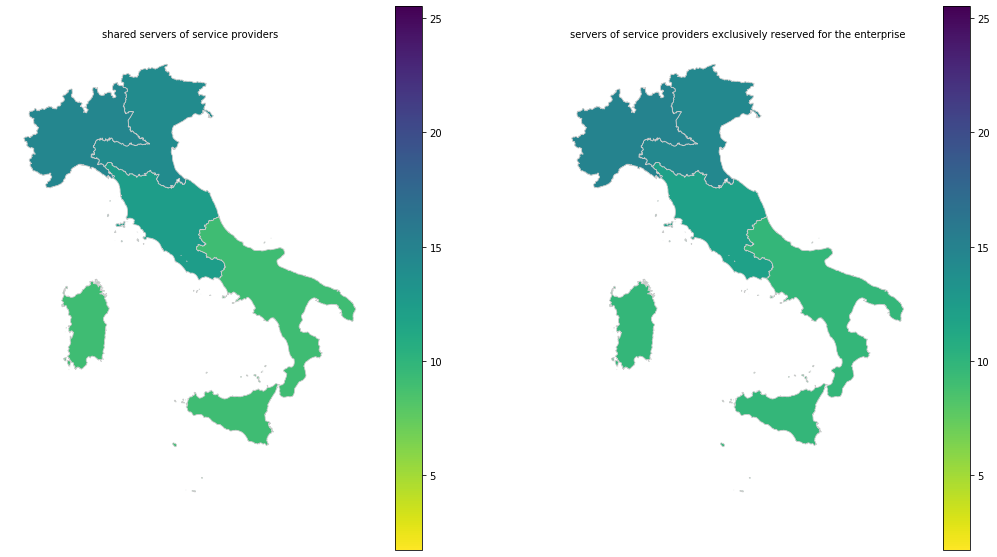

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))

# FIRST GRAPH
ax[0].axis('off')
ax[0].set_title(text_1, fontsize=10)
merged_1.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)


# SECOND GRAPH
ax[1].axis('off')
ax[1].set_title(text_2, fontsize=10)
merged_2.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)



## Dataset 3 (big data analysis)

In [26]:
complete_dataframe = pd.read_csv("data/2nd_block/big_data.csv")

# Drop useless columns and rows
complete_dataframe = complete_dataframe.drop(complete_dataframe[complete_dataframe['NACE 2007'] != "total economic activities  (c-n, including 951, excluding 75 and k)"].index)
complete_dataframe = complete_dataframe.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags", "NACE 2007", "Size classes of persons employed"], axis=1)

# geographical area based
geo_areas = ['Nord-ovest', 'Nord-est', 'Centro (I)', 'Mezzogiorno']
complete_dataframe = complete_dataframe.loc[complete_dataframe['Territory'].isin(geo_areas)]

In [27]:
complete_dataframe.head()

Territory                                          Data type  TIME  \
336  Nord-ovest       enterprises analysing big data (percentages)  2018   
337  Nord-ovest  enterprises analysing big own data from smart ...  2018   
338  Nord-ovest  enterprises analysing big geolocation data fro...  2018   
339  Nord-ovest  enterprises analysing big data generated from ...  2018   
340  Nord-ovest  enterprises analysing other big data sources (...  2018   

     Value  
336   8.36  
337   3.64  
338   2.84  
339   2.69  
340   2.90

In [28]:
df_1 = complete_dataframe
text = ["enterprises analysing big data (percentages)" , "enterprises analysing big data through enterprises's own employees (incl. those employed in parent or affiliate enterprisess)  (percentages)", "enterprises analysing big data through external service provider  (percentages)  "]
for t in text:
    df_1 = df_1.drop(df_1[df_1['Data type'] == t].index)

x_data = list(df_1['Territory'].unique())

y_data = []
for dt in df_1['Data type'].unique():
    y_data.append(list(df_1.loc[df_1['Data type'] == dt]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=df_1['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600, xaxis={'categoryorder':'total descending'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.4,
    xanchor="center",
    x=1,
    title = "Areas: "
))
fig

In [29]:
text_1 = "enterprises analysing big data (percentages)"
text_2 = "enterprises analysing big data through enterprises's own employees (incl. those employed in parent or affiliate enterprisess)  (percentages)"
text_3 = "enterprises analysing big data through external service provider  (percentages)  "

# Create specific subset of the dataset 
df_1  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_1].index)
df_2  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_2].index)
df_3  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_3].index)


# Merge the map with the pandas df
merged_1 = pd.merge(map_reg, df_1, left_on='DEN_REG', right_on='Territory', how='left')
merged_2 = pd.merge(map_reg, df_2, left_on='DEN_REG', right_on='Territory', how='left')
merged_3 = pd.merge(map_reg, df_3, left_on='DEN_REG', right_on='Territory', how='left')

# Union of the map by macro-area
merged_1 = merged_1.dissolve('Territory')
merged_2 = merged_2.dissolve('Territory')
merged_3 = merged_3.dissolve('Territory')


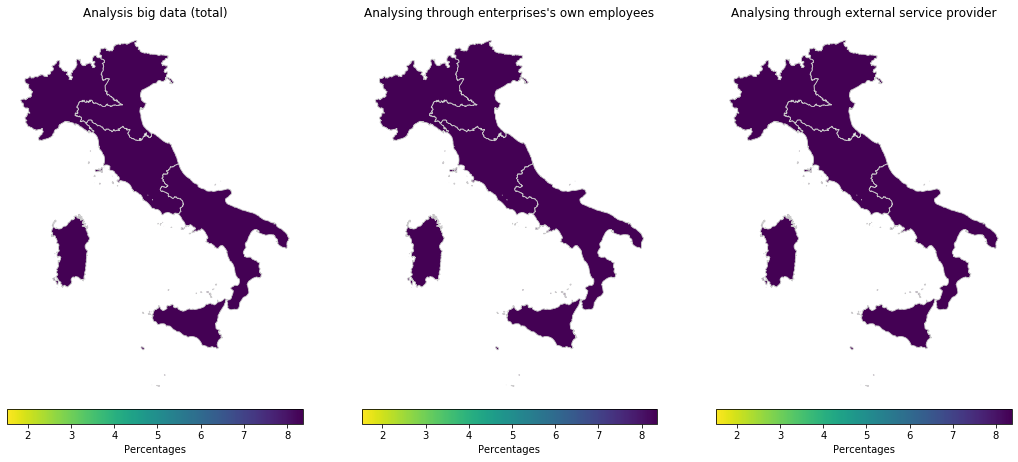

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 10))


# FIRST GRAPH: "Percentage of enterprises with paper invoicing"
ax[0].axis('off')
ax[0].set_title("Analysis big data (total)", fontsize=12)
merged_paper.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=False)

# Create the first colorbar
norm = colors.Normalize(vmin=min(complete_dataframe['Value']), vmax=max(complete_dataframe['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[0], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=10)

# SECOND GRAPH: "Percentage of enterprises with invoicing suitable for automation"
ax[1].axis('off')
ax[1].set_title("Analysing through enterprises's own employees", fontsize=12)
merged_automated.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=False)

# Create the second colorbar
norm = colors.Normalize(vmin=min(complete_dataframe['Value']), vmax=max(complete_dataframe['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[1], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=10)

# Third GRAPH: "Percentage of enterprises with invoicing non suitable for automation"
ax[2].axis('off')
ax[2].set_title("Analysing through external service provider", fontsize=12)
merged_non_automated.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=False)

# Create the third colorbar
norm = colors.Normalize(vmin=min(complete_dataframe['Value']), vmax=max(complete_dataframe['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[2], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentages', fontsize=10)

## Dataset 4 (ICT and training in ICT)

In [32]:
skills_training_df = pd.read_csv("data/2nd_block/skills_and_training.csv")

# Drop useless columns and rows
skills_training_df = skills_training_df.drop(skills_training_df[skills_training_df['NACE 2007'] != "total economic activities  (c-n, including 951, excluding 75 and k)"].index)
skills_training_df = skills_training_df.drop(skills_training_df[skills_training_df['Size classes of persons employed'] != "10 and over"].index)
skills_training_df = skills_training_df.drop(skills_training_df[skills_training_df['Data type'] == "for ICT/IT specialists (percentages)"].index)
skills_training_df = skills_training_df.drop(skills_training_df[skills_training_df['Data type'] == "for other persons employed (percentages)"].index)
skills_training_df = skills_training_df.drop(skills_training_df[skills_training_df['Data type'] == "with hard-to-fill vacancies for these jobs (percentages)"].index)
skills_training_df = skills_training_df.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags", "NACE 2007", "Size classes of persons employed"], axis=1)

# geographical area based
geo_areas = ['Nord-ovest', 'Nord-est', 'Centro (I)', 'Mezzogiorno']
skills_training_df = skills_training_df.loc[skills_training_df['Territory'].isin(geo_areas)]

# For reusability
complete_dataframe = skills_training_df

#### Choropleth map

Analisi geografica della percentuale di aziende che fanno svolgere funzioni di ICT all'interno o all'esterno dell'azienda

In [33]:
text_1 = "ict functions are performed by own/group persons employed (percentages)"
text_2 = "ict functions are performed by external suppliers (percentages)"

# Create specific subset of the dataset 
own_employers  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_1].index)
external_suppliers  = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] != text_2].index)

# For code reusability
df_1 = own_employers
df_2 = external_suppliers

# Merge the map with the pandas df
merged_1 = pd.merge(map_reg, df_1, left_on='DEN_REG', right_on='Territory', how='left')
merged_2 = pd.merge(map_reg, df_2, left_on='DEN_REG', right_on='Territory', how='left')

# Union of the map by macro-area
merged_1 = merged_1.dissolve('Territory')
merged_2 = merged_2.dissolve('Territory')
merged_1

geometry  COD_RIP  \
Territory                                                                 
Centro (I)   MULTIPOLYGON (((875952.995 4524692.050, 875769...        3   
Mezzogiorno  MULTIPOLYGON (((1265545.785 4472504.620, 12655...        4   
Nord-est     MULTIPOLYGON (((618343.929 4893985.661, 618335...        2   
Nord-ovest   MULTIPOLYGON (((568003.372 4884382.030, 568004...        1   

             COD_REG      DEN_REG    Shape_Leng    Shape_Area  \
Territory                                                       
Centro (I)         9   Centro (I)  1.305938e+06  2.298395e+10   
Mezzogiorno       16  Mezzogiorno  1.178211e+06  1.953564e+10   
Nord-est           4     Nord-est  8.008937e+05  1.360755e+10   
Nord-ovest         1   Nord-ovest  1.236787e+06  2.539389e+10   

                                                     Data type  TIME  Value  
Territory                                                                    
Centro (I)   ict functions are performed by own/group perso...  2019  24.18  
Mezzogiorno  ict functions are performed by own/group perso...  2019  16.52  
Nord-est     ict functions are performed by own/group perso...  2019  28.57  
Nord-ovest   ict functions are performed by own/group perso...  2019  27.22

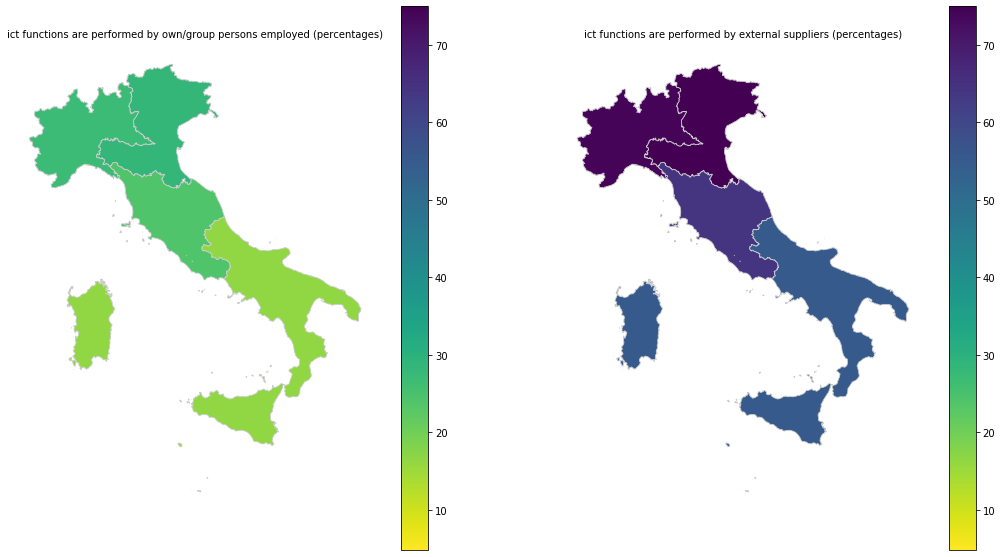

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))

# FIRST GRAPH: "Percentage of enterprises with paper invoicing"
ax[0].axis('off')
ax[0].set_title(text_1, fontsize=10)
merged_1.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)


# SECOND GRAPH: "Percentage of enterprises with invoicing suitable for automation"
ax[1].axis('off')
ax[1].set_title(text_2, fontsize=10)
merged_2.plot(column='Value', vmin = min(complete_dataframe['Value']), vmax = max(complete_dataframe['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)



#### Barchart

Stacked barchart che rappresenta una sorta di "indicatore" per i dipendendi assunti/addestrati con competenze ICT. Sarebbe utile utilizzare un peso per il numero di aziende per ogni macro-area in modo da avere dei valori piú significativi, discuterne l'utilitá.

In [ ]:
df_1 = complete_dataframe.drop(complete_dataframe[complete_dataframe['Data type'] == text_1].index)
df_1 = df_1.drop(df_1[df_1['Data type'] == text_2].index)

In [ ]:
fig = px.bar(df_1, x="Territory", y="Value", color="Data type", title="Employees ICT skills indicator" )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.5,
    xanchor="center",
    x=1,
    title = "Areas: "
), xaxis={'categoryorder':'total descending'})

fig.show()

In [ ]:
x_data = list(df_1['Territory'].unique())

y_data = []
for dt in df_1['Data type'].unique():
    y_data.append(list(df_1.loc[df_1['Data type'] == dt]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)', 'rgb(26, 118, 100)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=df_1['Data type'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600, xaxis={'categoryorder':'total descending'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.4,
    xanchor="center",
    x=1,
    title = "Areas: "
))
fig